In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from tqdm import tqdm
from utils import TimeseriesDataset
from model import nts_RNN, train_model

In [2]:
def run_training(dataset_name, seq_len, batch_size, learning_rate, hidden_size, weight_decay, save_model, model_save_name):
    train_dataset = TimeseriesDataset(dataset_name, seq_len)
    train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
    model = nts_RNN(hidden_size)
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    num_epoch = 1000
    loss_log = np.zeros(num_epoch)
    for epoch_id in tqdm(range(num_epoch)):
        loss_log[epoch_id] = train_model(train_loader, model, loss_function, optimizer)
        if epoch_id % 100 == 0 or epoch_id == num_epoch-1:
            print(f"Epoch {epoch_id}, loss: {loss_log[epoch_id]}\n-----------")

    if save_model == True:
        torch.save(model.state_dict(), "trained_models/"+model_save_name)
    return model, loss_log

In [5]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 2e-3, [8, 7, 6], 0, True, "L3_S10_B50_LR2e3_NR.pt")

  0%|          | 2/1000 [00:00<03:10,  5.24it/s]

Epoch 0, loss: 0.30699170258019
-----------


 10%|█         | 102/1000 [00:17<02:35,  5.78it/s]

Epoch 100, loss: 0.006448975608141704
-----------


 20%|██        | 202/1000 [00:35<02:19,  5.72it/s]

Epoch 200, loss: 0.004500467523390038
-----------


 30%|███       | 302/1000 [00:52<02:00,  5.80it/s]

Epoch 300, loss: 0.0038403133429320796
-----------


 40%|████      | 402/1000 [01:10<01:41,  5.91it/s]

Epoch 400, loss: 0.003469986142590642
-----------


 50%|█████     | 502/1000 [01:28<01:23,  5.97it/s]

Epoch 500, loss: 0.00288228820472096
-----------


 60%|██████    | 602/1000 [01:45<01:06,  5.99it/s]

Epoch 600, loss: 0.0022001557421850062
-----------


 70%|███████   | 702/1000 [02:02<00:49,  6.05it/s]

Epoch 700, loss: 0.0018292703613981727
-----------


 80%|████████  | 802/1000 [02:18<00:32,  6.00it/s]

Epoch 800, loss: 0.0015981873826144243
-----------


 90%|█████████ | 902/1000 [02:35<00:15,  6.15it/s]

Epoch 900, loss: 0.0015492607688449404
-----------


100%|██████████| 1000/1000 [02:51<00:00,  5.83it/s]

Epoch 999, loss: 0.0014158031115804768
-----------


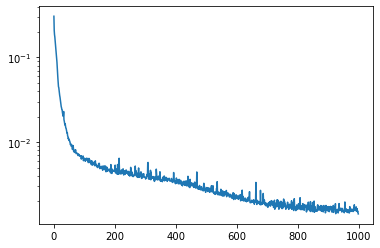

In [6]:
plt.figure()
plt.plot(range(1000), loss_log)
plt.yscale('log')

In [7]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 2e-3, [16], 0, True, "L1_16_S10_B50_LR2e3_NR.pt")

  0%|          | 2/1000 [00:00<02:11,  7.57it/s]

Epoch 0, loss: 0.2513675224650037
-----------


 10%|█         | 101/1000 [00:13<03:44,  4.01it/s]

Epoch 100, loss: 0.004532207045345926
-----------


 20%|██        | 202/1000 [00:30<01:47,  7.41it/s]

Epoch 200, loss: 0.002373470696441543
-----------


 30%|███       | 302/1000 [00:44<01:40,  6.94it/s]

Epoch 300, loss: 0.0017979627623540032
-----------


 40%|████      | 402/1000 [00:58<01:19,  7.57it/s]

Epoch 400, loss: 0.0014027338414222697
-----------


 50%|█████     | 502/1000 [01:11<01:08,  7.24it/s]

Epoch 500, loss: 0.0013103365068513244
-----------


 60%|██████    | 602/1000 [01:25<00:58,  6.86it/s]

Epoch 600, loss: 0.0010882856875688738
-----------


 70%|███████   | 702/1000 [01:39<00:41,  7.14it/s]

Epoch 700, loss: 0.0008697635516560135
-----------


 80%|████████  | 802/1000 [01:52<00:26,  7.45it/s]

Epoch 800, loss: 0.0007303515812164623
-----------


 90%|█████████ | 902/1000 [02:06<00:13,  7.20it/s]

Epoch 900, loss: 0.0009527401079149957
-----------


100%|██████████| 1000/1000 [02:19<00:00,  7.15it/s]

Epoch 999, loss: 0.0007972189343270876
-----------


  0%|          | 1/1000 [00:00<02:29,  6.66it/s]

Epoch 0, loss: 0.24494882754899644
-----------


 10%|█         | 102/1000 [00:13<02:12,  6.80it/s]

Epoch 100, loss: 0.012009058858953661
-----------


 20%|██        | 202/1000 [00:28<01:55,  6.89it/s]

Epoch 200, loss: 0.009599351654197652
-----------


 30%|███       | 302/1000 [00:43<01:31,  7.66it/s]

Epoch 300, loss: 0.008465879114477761
-----------


 40%|████      | 402/1000 [00:56<01:19,  7.50it/s]

Epoch 400, loss: 0.007613412044420429
-----------


 50%|█████     | 502/1000 [01:11<01:14,  6.73it/s]

Epoch 500, loss: 0.006890035787044646
-----------


 60%|██████    | 602/1000 [01:29<01:01,  6.43it/s]

Epoch 600, loss: 0.0066172105879369345
-----------


 70%|███████   | 702/1000 [01:45<00:46,  6.41it/s]

Epoch 700, loss: 0.006400748690754012
-----------


 80%|████████  | 802/1000 [02:00<00:30,  6.55it/s]

Epoch 800, loss: 0.006130437942344573
-----------


 90%|█████████ | 902/1000 [02:16<00:15,  6.48it/s]

Epoch 900, loss: 0.006507376641301172
-----------


100%|██████████| 1000/1000 [02:31<00:00,  6.60it/s]

Epoch 999, loss: 0.005815102088080904
-----------


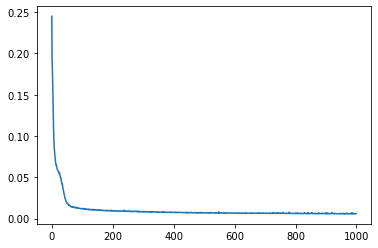

In [8]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 2e-3, [8], 0, True, "L1_8_S10_B50_LR2e3_NR.pt")
plt.figure()
plt.plot(range(1000), loss_log)
plt.yscale('log')

  0%|          | 2/1000 [00:00<03:03,  5.44it/s]

Epoch 0, loss: 0.2373430412057992
-----------


 10%|█         | 102/1000 [00:17<02:35,  5.77it/s]

Epoch 100, loss: 0.004453727880820304
-----------


 20%|██        | 202/1000 [00:35<02:14,  5.93it/s]

Epoch 200, loss: 0.0017916939392747296
-----------


 30%|███       | 302/1000 [00:52<01:58,  5.91it/s]

Epoch 300, loss: 0.000920041053937134
-----------


 40%|████      | 402/1000 [01:09<01:45,  5.69it/s]

Epoch 400, loss: 0.0009795578569557599
-----------


 50%|█████     | 502/1000 [01:26<01:24,  5.90it/s]

Epoch 500, loss: 0.000645975122397131
-----------


 60%|██████    | 602/1000 [01:43<01:09,  5.73it/s]

Epoch 600, loss: 0.0008070714004813684
-----------


 70%|███████   | 702/1000 [02:01<00:51,  5.74it/s]

Epoch 700, loss: 0.00048226521111855916
-----------


 80%|████████  | 802/1000 [02:18<00:34,  5.67it/s]

Epoch 800, loss: 0.0009206870691032036
-----------


 90%|█████████ | 902/1000 [02:38<00:17,  5.63it/s]

Epoch 900, loss: 0.0004727134546955822
-----------


100%|██████████| 1000/1000 [02:55<00:00,  5.69it/s]


Epoch 999, loss: 0.0005321605783467601
-----------


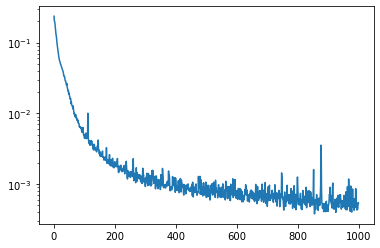

In [9]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 2e-3, [32], 0, True, "L1_32_S10_B50_LR2e3_NR.pt")
plt.figure()
plt.plot(range(1000), loss_log)
plt.yscale('log')

  0%|          | 1/1000 [00:00<03:52,  4.30it/s]

Epoch 0, loss: 0.30607805605773086
-----------


 10%|█         | 101/1000 [00:20<03:01,  4.95it/s]

Epoch 100, loss: 0.010597159935079597
-----------


 20%|██        | 202/1000 [00:41<02:49,  4.70it/s]

Epoch 200, loss: 0.006758511519305162
-----------


 30%|███       | 301/1000 [01:01<02:24,  4.84it/s]

Epoch 300, loss: 0.004663441800972917
-----------


 40%|████      | 401/1000 [01:22<02:10,  4.61it/s]

Epoch 400, loss: 0.0037251440820969886
-----------


 50%|█████     | 501/1000 [01:43<01:41,  4.93it/s]

Epoch 500, loss: 0.0033594456649702654
-----------


 60%|██████    | 602/1000 [02:04<01:20,  4.96it/s]

Epoch 600, loss: 0.0032311351330193516
-----------


 70%|███████   | 702/1000 [02:25<01:00,  4.92it/s]

Epoch 700, loss: 0.0027917382335495
-----------


 80%|████████  | 801/1000 [02:45<00:39,  4.99it/s]

Epoch 800, loss: 0.00254778224772743
-----------


 90%|█████████ | 902/1000 [03:06<00:19,  4.92it/s]

Epoch 900, loss: 0.0024198573172235717
-----------


100%|██████████| 1000/1000 [03:25<00:00,  4.85it/s]

Epoch 999, loss: 0.002175113293060849
-----------


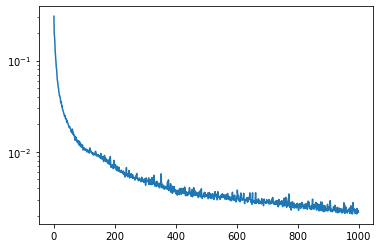

In [10]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 2e-3, [8, 7, 6], 1e-4, True, "L3_S10_B50_LR2e3_R1e4.pt")
plt.figure()
plt.plot(range(1000), loss_log)
plt.yscale('log')

  0%|          | 2/1000 [00:00<02:59,  5.57it/s]

Epoch 0, loss: 0.250723955149834
-----------


 10%|█         | 102/1000 [00:16<02:23,  6.26it/s]

Epoch 100, loss: 0.004136262938078329
-----------


 20%|██        | 202/1000 [00:31<02:00,  6.64it/s]

Epoch 200, loss: 0.0026822532898142606
-----------


 30%|███       | 302/1000 [00:46<01:43,  6.77it/s]

Epoch 300, loss: 0.00236199307959056
-----------


 40%|████      | 402/1000 [01:01<01:28,  6.72it/s]

Epoch 400, loss: 0.001801279987525809
-----------


 50%|█████     | 502/1000 [01:16<01:21,  6.12it/s]

Epoch 500, loss: 0.0023899293001894686
-----------


 60%|██████    | 602/1000 [01:31<01:01,  6.48it/s]

Epoch 600, loss: 0.0022231055165200936
-----------


 70%|███████   | 702/1000 [01:47<00:44,  6.71it/s]

Epoch 700, loss: 0.0017941923419289947
-----------


 80%|████████  | 802/1000 [02:04<00:54,  3.62it/s]

Epoch 800, loss: 0.0020535441290121526
-----------


 90%|█████████ | 901/1000 [02:20<00:25,  3.93it/s]

Epoch 900, loss: 0.0017016756851712222
-----------


100%|██████████| 1000/1000 [02:38<00:00,  6.32it/s]


Epoch 999, loss: 0.0017236015231062013
-----------


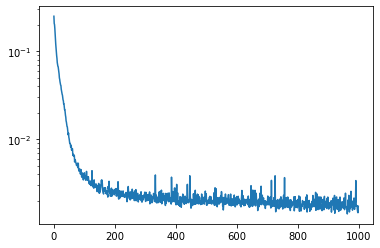

In [11]:
model, loss_log = run_training('TrainSet.mat', 10, 50, 2e-3, [32], 1e-4, True, "L1_32_S10_B50_LR2e3_R1e4.pt")
plt.figure()
plt.plot(range(1000), loss_log)
plt.yscale('log')